In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

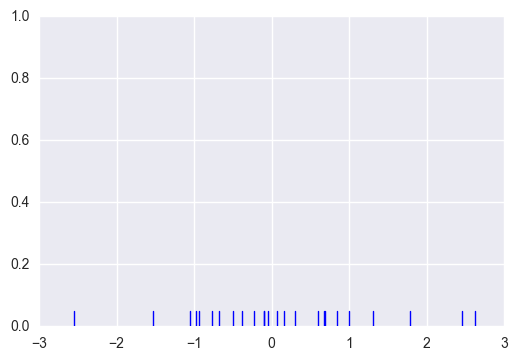

In [3]:
sns.rugplot(dataset)

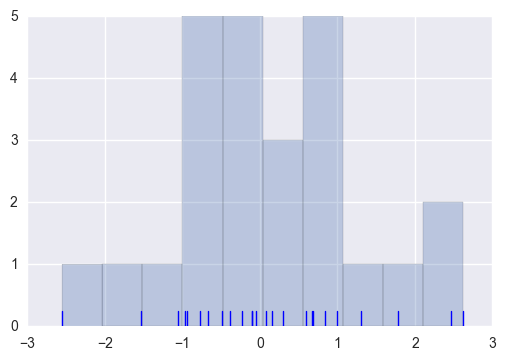

In [4]:
plt.hist(dataset, alpha=.3)
sns.rugplot(dataset)

(0, 1)

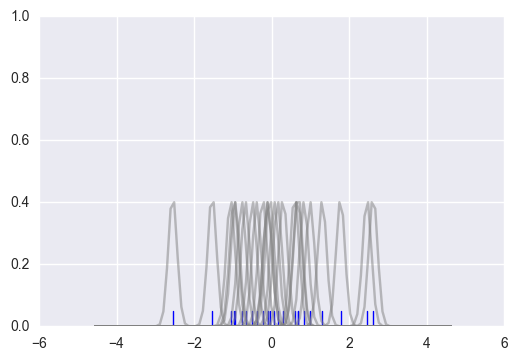

In [7]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwith = ( (4 * dataset.std() ** 5 )  / (3 * len(dataset)))

kernel_list = []
for data_point in dataset: 
    kernel = stats.norm(data_point, bandwith).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='grey', alpha=.5)


plt.ylim(0,1)

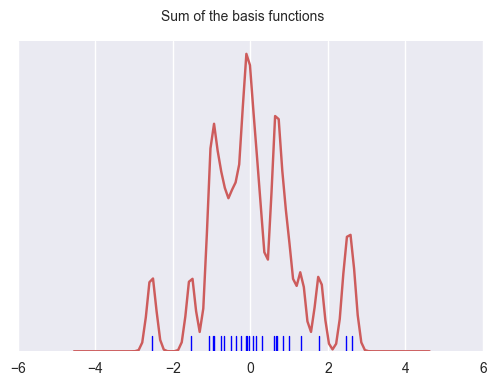

In [9]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

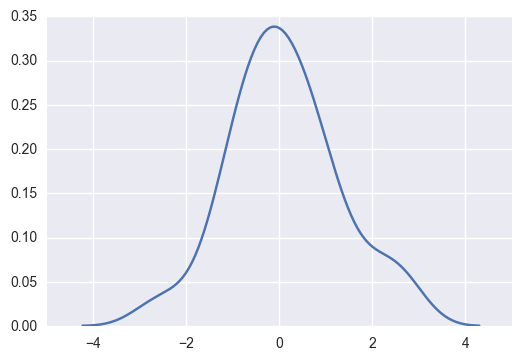

In [10]:
sns.kdeplot(dataset)

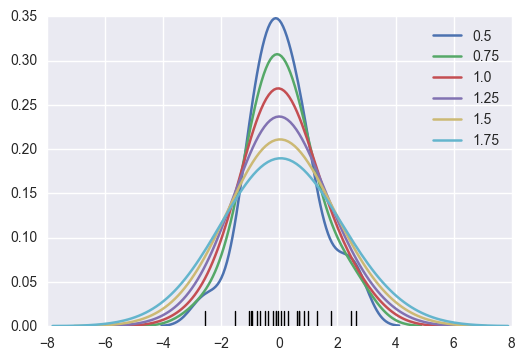

In [11]:
sns.rugplot(dataset, color='black')

for bw in np.arange(.5, 2, .25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label = bw)

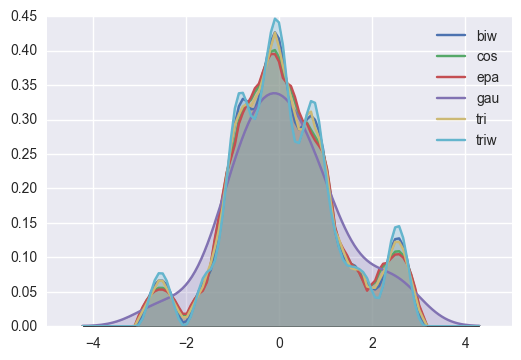

In [13]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label= kern, shade=True)

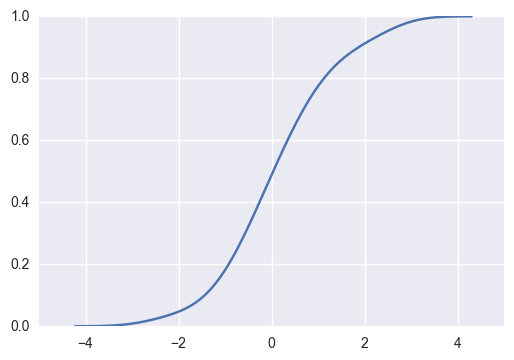

In [14]:
sns.kdeplot(dataset, cumulative=True)

In [15]:
mean = [0,0]
cov = [[1,0], [0, 100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

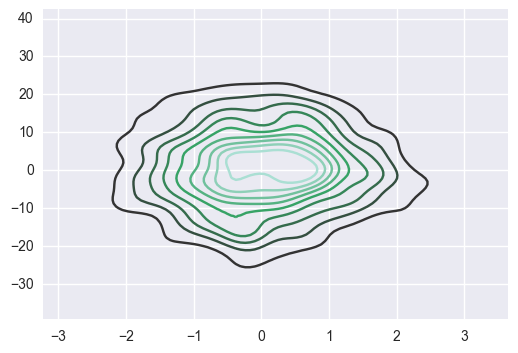

In [16]:
dframe = pd.DataFrame(dataset2, columns = ['X', 'Y'])

sns.kdeplot(dframe)

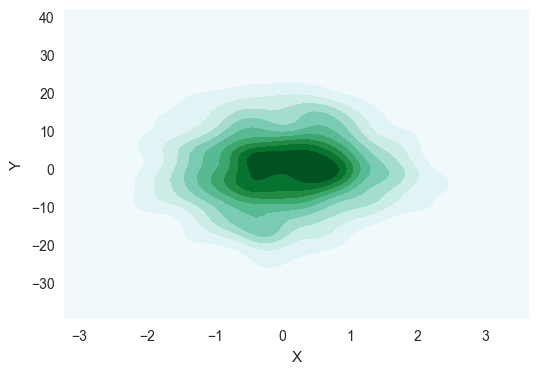

In [18]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

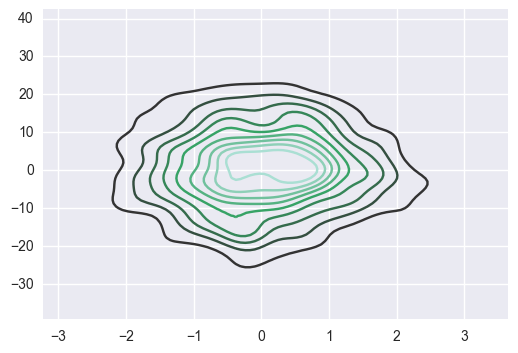

In [21]:
sns.kdeplot(dframe, bandwith='silverman')

In [ ]:
sns.jointplot('X')